In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
#import cpickle as pickle

#price_df = pd.read_csv("20180101_hourly_prices.csv")
price_df=pd.read_pickle("data_spread")
price_df.head(5)

,106THSO_LNODED1,118THSO_LNODER1,13THSO_LNODE-3,13THSO_LNODED2,23RDST_LNODED3,26FTDROP_GNODEIT,2C559EQ2_7_N001,3RDWEST_LNODED1,3RDWEST_LNODED2,5THWEST_LNODED1,...,WLSV_LNODEWR1,WLSV_LNODEWR2,WLSV_LNODEWR3,WNP_2_GNODE1,WPRT_LNODEWR1,WPRT_LNODEWR2,WUNI_LNODEWR1,WUNI_LNODEWR2,YMHL_LNODEBR1,YMHL_LNODEBR2
Date,,,,,,,,,,,,,,,,,,,,,
20160301,9.82555,9.82555,10.32424,9.81753,9.80323,9.71557,35.56096,9.82223,9.82223,9.81956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160302,24.08801,24.08393,26.44433,24.06762,24.05132,23.72926,32.62693,24.08393,24.08393,24.07985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160303,20.54867,20.53885,22.74389,20.55618,20.62541,20.53256,27.54345,20.57052,20.57052,20.56071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160304,20.49322,20.49322,21.80458,20.48818,20.48539,20.31557,23.35957,20.49398,20.49398,20.49398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160305,22.56454,22.56454,24.02016,22.54972,22.51486,21.21754,26.52639,22.55557,22.55557,22.55557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
price_df.head(50)

,106THSO_LNODED1,118THSO_LNODER1,13THSO_LNODE-3,13THSO_LNODED2,23RDST_LNODED3,26FTDROP_GNODEIT,2C559EQ2_7_N001,3RDWEST_LNODED1,3RDWEST_LNODED2,5THWEST_LNODED1,...,WLSV_LNODEWR1,WLSV_LNODEWR2,WLSV_LNODEWR3,WNP_2_GNODE1,WPRT_LNODEWR1,WPRT_LNODEWR2,WUNI_LNODEWR1,WUNI_LNODEWR2,YMHL_LNODEBR1,YMHL_LNODEBR2
Date,,,,,,,,,,,,,,,,,,,,,
20160301,9.82555,9.82555,10.32424,9.81753,9.80323,9.71557,35.56096,9.82223,9.82223,9.81956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160302,24.08801,24.08393,26.44433,24.06762,24.05132,23.72926,32.62693,24.08393,24.08393,24.07985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160303,20.54867,20.53885,22.74389,20.55618,20.62541,20.53256,27.54345,20.57052,20.57052,20.56071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160304,20.49322,20.49322,21.80458,20.48818,20.48539,20.31557,23.35957,20.49398,20.49398,20.49398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160305,22.56454,22.56454,24.02016,22.54972,22.51486,21.21754,26.52639,22.55557,22.55557,22.55557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160306,31.63536,31.63557,33.59622,31.61020,31.56198,31.33722,34.93881,31.62069,31.62069,31.62069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160307,21.23137,21.23137,22.65739,21.21256,21.17060,23.57434,19.88186,21.22145,21.22145,21.22145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160308,20.72207,20.72207,22.12043,20.71918,20.70219,22.30272,31.31849,20.71837,20.71837,20.71837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160309,20.85790,20.85790,22.56021,20.83863,20.81257,18.87469,37.06765,20.85196,20.85196,20.85196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


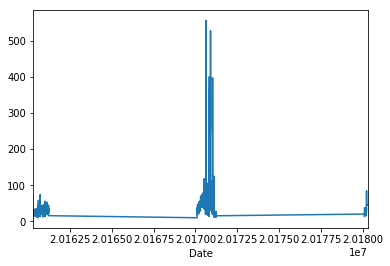

In [3]:
temp=price_df["106THSO_LNODED1"]
#temp.set_index("Timestamp",inplace=True)
#temp.head(5)
temp.plot()



In [4]:
#window is selected as 24 owing to the data being hourly prices

rolmean = temp.rolling(window=24).mean()
rolstd = temp.rolling(window=24).std()

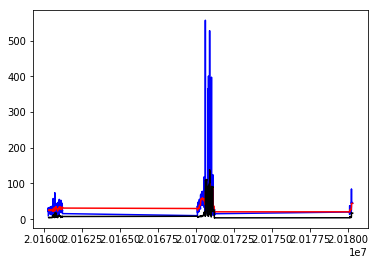

In [5]:
import matplotlib.pylab as plt

orig = plt.plot(temp,color="blue",label="Original")
mean_d = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std_d = plt.plot(rolstd,color = "black", label = "Rolling Std")
plt.show()

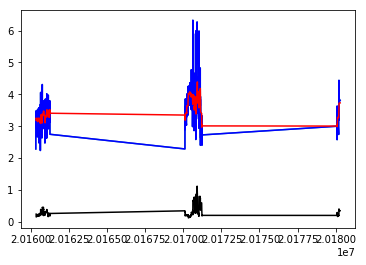

In [6]:
#Taking (or Trying the log) = Gives no significant advantage
#There is no particular trend

temp_log = np.log(temp)
plt.plot(temp_log)


rolmean_log = temp_log.rolling(window=24).mean()
rolstd_log = temp_log.rolling(window=24).std()

orig = plt.plot(temp_log,color="blue",label="Original")
mean_d = plt.plot(rolmean_log, color = "red", label = "Rolling Mean")
std_d = plt.plot(rolstd_log,color = "black", label = "Rolling Std")
plt.show()

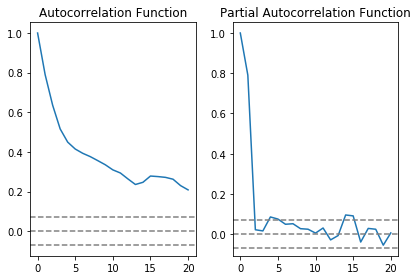

In [7]:
#finding the p and q values
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf (temp_log, nlags=20)
lag_pacf = pacf (temp_log, nlags=20, method = "ols")

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

#We choose p as 5 and q as 2


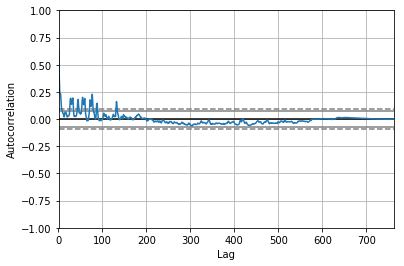

In [8]:
#Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

autocorrelation_plot(temp)
#pyplot.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp, order=(5,0,2))
model_fit=model.fit(disp=0)


C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:        106THSO_LNODED1   No. Observations:                  762
Model:                     ARMA(5, 2)   Log Likelihood               -3760.266
Method:                       css-mle   S.D. of innovations             33.629
Date:                Wed, 01 May 2019   AIC                           7538.532
Time:                        01:13:57   BIC                           7580.255
Sample:                             0   HQIC                          7554.597
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    40.5254      3.808     10.641      0.000      33.061      47.989
ar.L1.106THSO_LNODED1     0.3913      0.318      1.229      0.219      -0.233       1.015
ar.L2.10

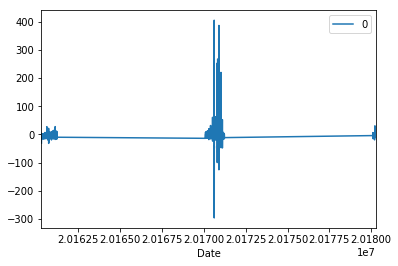

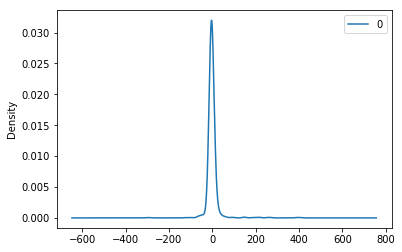

                0
count  762.000000
mean     0.036622
std     33.658953
min   -296.346957
25%     -7.810634
50%     -3.175035
75%      2.258795
max    405.325611


In [10]:
from pandas import DataFrame

print(model_fit.summary())
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [11]:
model_fit.forecast()

(array([44.13866883]),
 array([33.62918441]),
 array([[-21.77332144, 110.0506591 ]]))

<h2> Incremental Predictions </h2>

In [12]:
len(price_df)
price_df_train = price_df.head(650)

In [13]:
price_df_test = price_df.tail(-650)

In [ ]:
predictions = list()
history = list()

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

def rolling_predictions(x):
    price_df_train = x.head(650)
    price_df_test = x.tail(-650)
    for i in range(len(price_df_test)):
        if i == (len(price_df_test)-2):
            break
        model = ARIMA(x.head(650 + i),order = (5,0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        predicted_value = output[0]
        predictions.append(predicted_value)
        actual_value=price_df_test.iloc[i]
        history.append(actual_value)
        #print("Predicted value {} Actual value {}".format(predicted_value,actual_value))
    error = mean_squared_error(history,predictions)
    print(error)
    plt.plot(history,label = "Historical Data")
    plt.plot(predictions,label = "Predicted Value")
    plt.legend(loc ='upper left')
    plt.show()

temp = price_df["106THSO_LNODED1"]
rolling_predictions(temp)
